### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from numpy import isnan
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import Birch
from numpy import unique
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import os
import time

### Read the data

In [2]:
df1=pd.read_csv('train.csv')


### Glimps data

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df1.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00
mean,4.08,6998.18,-7791.05,-8605.14,-958.27,-6982.04,-7000.76,-7205.37,-43.03,-7007.12,-7221.97,-949.84,-804.02,-989.37,-8515.78,-8515.69,-8585.16
std,2.46,3797.94,4168.06,3491.48,2969.16,4592.48,4582.29,4486.57,990.10,4578.76,4480.14,2944.07,4177.16,3028.43,3554.02,3554.22,3484.04
min,0.00,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,2.00,3757.87,-9999.00,-9999.00,8.50,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,0.65,0.67,15.20,-9999.00,-9999.00,-9999.00
50%,4.00,6905.18,-9999.00,-9999.00,17.50,-9999.00,-9999.00,-9999.00,55.51,-9999.00,-9999.00,1.10,1.15,24.97,-9999.00,-9999.00,-9999.00
75%,6.00,10052.49,-9999.00,-9999.00,26.00,8.56,2.25,0.03,78.98,0.09,0.06,2.02,2.15,30.63,-9999.00,-9999.00,-9999.00
max,8.00,15651.58,181.81,388.84,36.00,20.33,3.09,0.33,1124.44,1.46,13.84,80266.80,97543.40,208.63,0.40,1.00,3.65


In [4]:
df1.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.33,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,0,335.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.82,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0,336.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.52,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
3,0,336.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,7.23,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
4,0,337.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,9.50,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00


### Handling missing values

In [5]:
df1.replace(['-9999', -9999], np.nan, inplace=True)
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,NaN,NaN,NaN,NaN,NaN,NaN,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,335.66,NaN,NaN,NaN,NaN,NaN,NaN,5.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,336.16,NaN,NaN,NaN,NaN,NaN,NaN,6.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,336.66,NaN,NaN,NaN,NaN,NaN,NaN,7.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,337.16,NaN,NaN,NaN,NaN,NaN,NaN,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,NaN,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,NaN,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,NaN,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,NaN,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


In [6]:
col_names =list(df1.columns.values[-3:])
df1.dropna(axis=0, subset=col_names, inplace=True)
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
27573,0,14121.66,89.65,NaN,NaN,9.90,2.58,NaN,88.86,0.28,NaN,2.63,2.49,NaN,0.00,1.00,0.75
27574,0,14122.16,96.02,NaN,NaN,9.99,2.47,NaN,120.89,0.29,NaN,2.48,2.47,NaN,0.00,1.00,1.03
27575,0,14122.66,104.05,NaN,NaN,9.90,2.33,NaN,153.52,0.45,NaN,2.44,2.37,NaN,0.00,1.00,1.31
27576,0,14123.16,113.50,NaN,NaN,9.90,2.24,NaN,182.85,0.58,NaN,2.41,2.41,NaN,0.00,1.00,1.68
27577,0,14123.66,117.78,NaN,NaN,9.81,2.23,NaN,256.20,0.56,NaN,2.34,2.41,NaN,0.00,1.00,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,NaN,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,NaN,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,NaN,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,NaN,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


In [8]:
df1.isna().sum()

WELLNUM        0
DEPTH          0
DTC        22995
DTS        35111
BS          1880
CALI           0
DEN            0
DENC        1880
GR             0
NEU            3
PEF         1880
RDEP         234
RMED           0
ROP         1977
PHIF           0
SW             0
VSH            0
dtype: int64

## Drop missing values

In [9]:


# remove all rows that contains missing value 
#col_names=['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
     #   'RDEP', 'RMED','ROP']
#col_names=['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
     #   'RDEP', 'ROP']
col_names=['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED']    


# remove all rows that contains missing value 

df1.dropna(axis=0, subset=col_names, inplace=True)

df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
96439,2,11251.31,89.99,186.79,8.50,8.62,2.45,0.05,75.17,0.31,0.05,1.59,1.96,27.40,0.13,0.62,1.00
96440,2,11251.64,90.13,185.71,8.50,8.62,2.45,0.04,71.38,0.30,0.04,0.90,0.81,27.39,0.12,0.64,0.95
96441,2,11251.97,90.26,184.65,8.50,8.62,2.46,0.03,65.64,0.29,0.03,0.85,0.56,27.37,0.12,0.80,0.86
96442,2,11252.30,90.39,183.58,8.50,8.62,2.49,0.02,58.90,0.29,0.02,0.87,0.51,27.38,0.10,1.00,0.76
96443,2,11252.63,90.43,182.97,8.50,8.62,2.52,0.02,53.51,0.28,0.02,0.80,0.53,27.38,0.08,1.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295605,7,14805.12,81.53,146.43,8.50,8.78,2.55,0.08,84.66,0.18,7.03,1.90,2.23,14.96,0.06,1.00,0.80
295606,7,14805.45,81.30,147.06,8.50,8.78,2.55,0.08,85.66,0.18,7.12,1.86,2.20,14.96,0.06,1.00,0.81
295607,7,14805.77,81.16,147.02,8.50,8.78,2.54,0.07,86.66,0.18,7.18,1.81,2.11,14.95,0.06,1.00,0.82
295608,7,14806.10,81.13,146.92,8.50,8.78,2.54,0.07,87.67,0.18,7.21,1.76,2.03,14.95,0.06,1.00,0.83


In [10]:

#pca = PCA(n_components=116)
corr_matr=df1[1:].corr()
#corr_matr['PHIF'].sort_values(ascending=False)
corr_matr['SW'].sort_values(ascending=False)
#corr_matr['VSH'].sort_values(ascending=False)
#corr_matr
#df1

SW         1.00
DEN        0.65
GR         0.45
VSH        0.44
DENC       0.37
CALI       0.37
DEPTH      0.22
NEU       -0.02
ROP       -0.04
WELLNUM   -0.06
RMED      -0.09
DTS       -0.12
PEF       -0.18
DTC       -0.44
RDEP      -0.49
PHIF      -0.66
BS          NaN
Name: SW, dtype: float64

In [11]:
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
96439,2,11251.31,89.99,186.79,8.50,8.62,2.45,0.05,75.17,0.31,0.05,1.59,1.96,27.40,0.13,0.62,1.00
96440,2,11251.64,90.13,185.71,8.50,8.62,2.45,0.04,71.38,0.30,0.04,0.90,0.81,27.39,0.12,0.64,0.95
96441,2,11251.97,90.26,184.65,8.50,8.62,2.46,0.03,65.64,0.29,0.03,0.85,0.56,27.37,0.12,0.80,0.86
96442,2,11252.30,90.39,183.58,8.50,8.62,2.49,0.02,58.90,0.29,0.02,0.87,0.51,27.38,0.10,1.00,0.76
96443,2,11252.63,90.43,182.97,8.50,8.62,2.52,0.02,53.51,0.28,0.02,0.80,0.53,27.38,0.08,1.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295605,7,14805.12,81.53,146.43,8.50,8.78,2.55,0.08,84.66,0.18,7.03,1.90,2.23,14.96,0.06,1.00,0.80
295606,7,14805.45,81.30,147.06,8.50,8.78,2.55,0.08,85.66,0.18,7.12,1.86,2.20,14.96,0.06,1.00,0.81
295607,7,14805.77,81.16,147.02,8.50,8.78,2.54,0.07,86.66,0.18,7.18,1.81,2.11,14.95,0.06,1.00,0.82
295608,7,14806.10,81.13,146.92,8.50,8.78,2.54,0.07,87.67,0.18,7.21,1.76,2.03,14.95,0.06,1.00,0.83


### Feature selection

In [12]:
# feature selection

# define feature selection
fs = SelectKBest(score_func=f_regression, k=11) #try different score functions
# apply feature selection
X_selected_PHIF = fs.fit_transform(df1.iloc[:,1:13],df1.iloc[:,14])
filter = fs.get_support() #k features taken into account
indexes_best_PHIF=df1.iloc[:,1:13].columns[filter]

X_selected_SW = fs.fit_transform(df1.iloc[:,1:13],df1.iloc[:,15])
filter = fs.get_support() #k features taken into account
indexes_best_SW=df1.iloc[:,1:13].columns[filter]

X_selected_VSH = fs.fit_transform(df1.iloc[:,1:13],df1.iloc[:,16])
filter = fs.get_support() #k features taken into account
indexes_best_VSH=df1.iloc[:,1:13].columns[filter]

indexes_best_PHIF,indexes_best_PHIF,indexes_best_VSH

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zer

(Index(['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED'],
       dtype='object'),
 Index(['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED'],
       dtype='object'),
 Index(['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED'],
       dtype='object'))

### Removing outliers

In [13]:
df1_best=df1[indexes_best_PHIF] #activate it you used first option
clf = IsolationForest(random_state=0).fit_predict(df1_best) #better
df1_x_train = df1_best[clf==1]
df1_y_train=df1.iloc[clf==1,[14,15,16]]
df1_y_train


,PHIF,SW,VSH
96483,0.02,1.00,0.81
96484,0.02,1.00,0.86
96485,0.02,1.00,0.87
96486,0.02,1.00,0.93
96487,0.02,1.00,0.97
...,...,...,...
295605,0.06,1.00,0.80
295606,0.06,1.00,0.81
295607,0.06,1.00,0.82
295608,0.06,1.00,0.83


In [14]:
#df1_x_train=df1_x_train[df1_x_train.loc[:,'PEF'] != min(df1_x_train.loc[:,'PEF'])]
#sns.pairplot(pd.concat([df1_x_train,df1_y_train.loc[:,'VSH']],axis=1))

### Correlation 

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='VSH'>

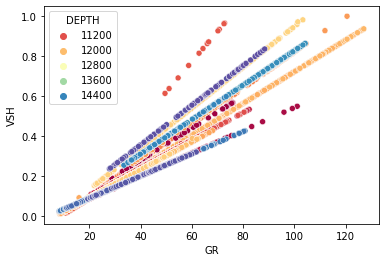

In [15]:
sns.scatterplot(df1_x_train.loc[:,'GR'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
#plt.xlim((40,60))
#plt.ylim((0.2,0.5))

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='DEPTH'>

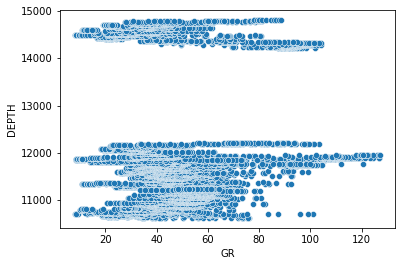

In [16]:
sns.scatterplot(df1_x_train.loc[:,'GR'],df1_x_train.loc[:,'DEPTH'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEPTH', ylabel='VSH'>

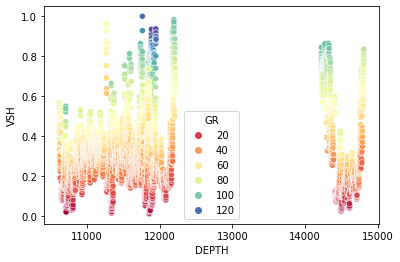

In [17]:
sns.scatterplot(df1_x_train.loc[:,'DEPTH'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'GR'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 6.0)

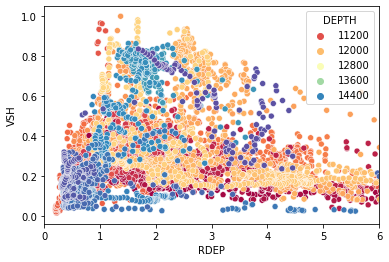

In [18]:
sns.scatterplot(df1_x_train.loc[:,'RDEP'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
plt.xlim((0,6))
#plt.ylim((0.4,0.5))

### Scaling the data

In [18]:
scaler=StandardScaler()
df1_x_train=pd.DataFrame(scaler.fit_transform(df1_x_train),columns=df1_x_train.columns,index=df1_x_train.index)

In [19]:
df1_x_train.describe()

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED
count,6529.00,6529.00,6529.00,6529.00,6529.00,6529.00,6529.00,6529.00,6529.00,6529.00,6529.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.16,-2.62,-3.31,-4.75,-2.36,-6.05,-1.77,-2.58,-1.48,-0.70,-0.57
25%,-0.72,-0.72,-0.62,-0.98,-0.85,-0.60,-0.66,-0.64,-1.46,-0.46,-0.42
50%,-0.30,-0.12,0.07,0.15,0.15,0.00,-0.18,-0.00,0.48,-0.28,-0.28
75%,-0.00,0.80,0.59,0.77,0.72,0.55,0.41,0.66,0.73,0.06,0.05
max,1.98,2.67,4.51,4.31,2.76,6.09,3.56,3.71,1.81,9.50,16.13


### Split the data

In [20]:
# Here, we separate train and test data by wells
ns = int(df1_x_train.shape[0]*80/100)
X_train, X_val = df1_x_train[:ns], df1_x_train[ns:]
y_train, y_val = df1_y_train[:ns], df1_y_train[ns:]

# # if you want to separate train and test data randomly
# # please remember to use random_state for all randomization steps, this will ensure we get the same results 
# # as yours during the validation phase. 
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=100)

### Train the model

In [21]:

def grid_search(clf, param_grid, X_train=X_train, y_train=y_train,ht='random'):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    if ht=='random':
        grid = RandomizedSearchCV(estimator=clf, 
                            param_distributions=param_grid, 
                            scoring='r2',n_iter=60,
                            cv=5)
    else:
        grid = GridSearchCV(estimator=clf, 
                            param_grid=param_grid, 
                            scoring='r2', 
                            cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_estimator_)
    return grid.best_estimator_

In [22]:
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real.iloc[:,i], y_predict.iloc[:,i])))
        R2.append(r2_score(y_real.iloc[:,i], y_predict.iloc[:,i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real.iloc[:n_points, i])
        plt.plot(y_predict.iloc[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real.iloc[:, i], y_predict.iloc[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()



In [23]:
y_pred_clusts=pd.DataFrame()
y_true_clusts=pd.DataFrame()

y_pred_clust=[1,2,3]
y_true_clust=[2,3,4]

pd.concat([y_pred_clusts,pd.Series(y_pred_clust)],axis=1)
#pd.concat([y_true_clusts,pd.Series(y_true_clust)],axis=1)

,0
0,1
1,2
2,3


In [37]:

# define the model
from numpy.random import seed
seed(80)
reg = GradientBoostingRegressor(random_state=100)
rf=RandomForestRegressor(n_estimators=100, random_state=100)
exreg = ExtraTreesRegressor(n_estimators=100, random_state=100)
adreg= AdaBoostRegressor(n_estimators=100, random_state=100)
lr=LinearRegression()
poly=PolynomialFeatures(degree=2,include_bias=False)
n_clust=0
if n_clust > 1:
    birch = Birch(threshold=0.01, n_clusters=n_clust)
    # fit the model
    birch.fit(X_train)
    # assign a cluster to each example
    yhat = birch.predict(X_train)
    # retrieve unique clusters
    clusters = unique(yhat)
    #for cluster in clusters:
    #    # get row indexes for samples with this cluster
    #    row_ix = where(yhat == cluster)
    names=['PHIF', 'SW']+[range(n_clust)]
    names
    #reg_best = grid_search(reg, {})
    yhat_val = birch.predict(X_val)
    clusts=[]
    clusts_val=[]


    for i in range(n_clust):
        clust=np.where(yhat==i)
        clusts.append(clust) # dataframes nested into a list

        clust_val=np.where(yhat_val==i)
        clusts_val.append(clust_val)
    clusters=[]
    cluster_instances=[]
    VSH_true=pd.DataFrame([])
    VSH_pred=pd.DataFrame([])


    clusters_val=[]
    cluster_instances_val=[]
    VSH_true_val=pd.DataFrame([])
    VSH_pred_val=pd.DataFrame([])


    for c,cval,i in zip(clusts,clusts_val,range(n_clust)):
        ind=c[0]
        cluster_instance=y_train['VSH'].iloc[ind]
        cluster_instances.append(cluster_instance)
        if i==0:
            reg_best_VSH = grid_search(rf, {},X_train.iloc[ind],y_train['VSH'].iloc[ind])
        else:  
            reg_best_VSH = grid_search(lr, {},X_train.iloc[ind],y_train['VSH'].iloc[ind])
        clust_results=reg_best_VSH.predict(X_train.iloc[ind])
        clusters.append(clust_results.tolist())
        VSH_pred=pd.concat([VSH_pred,pd.Series(clust_results)],axis=0)
        VSH_true=pd.concat([VSH_true,y_train['VSH'].iloc[ind]],axis=0)
        #cross_validation
        ind_val=cval[0]
        if ind_val.size:
            cluster_instance_val=y_val['VSH'].iloc[ind_val]
            cluster_instances_val.append(cluster_instance_val)
            clust_results_val=reg_best_VSH.predict(X_val.iloc[ind_val])
            clusters_val.append(clust_results_val.tolist())
            VSH_pred_val=pd.concat([VSH_pred_val,pd.Series(clust_results_val)],axis=0)
            VSH_true_val=pd.concat([VSH_true_val,y_val['VSH'].iloc[ind_val]],axis=0) 
else:
        
    opt = keras.optimizers.Adam(learning_rate=0.0000024, beta_1=0.9,beta_2=0.99,epsilon=1e-08,amsgrad='False')
    model=keras.models.Sequential([keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(1250,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.07),
                                   #keras.layers.Dense(2400,activation='elu',
                                                   #   kernel_initializer='glorot_normal',
                                                   #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                  #   ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(50,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.21),
                                   keras.layers.Dense(1,activation='sigmoid')])
    #model.summary()
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    root_logdir=os.path.join(os.curdir,'my_logs')
    def get_run_logdir():
        
        run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
        return os.path.join(root_logdir,run_id)
    run_logdir=get_run_logdir()
    tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
    early_stopping_cb=keras.callbacks.EarlyStopping(patience=70,restore_best_weights=True)
    
    
    
    history=model.fit(np.array(X_train),np.array(y_train['VSH']),
    epochs=1000,validation_data=(X_val,y_val['VSH']),
                     callbacks=[early_stopping_cb])

#SW  GradientBoostingRegressor(max_depth=8, max_features='auto', max_leaf_nodes=9,
            #n_estimators=80, random_state=100)
param_grid={"max_depth" : [7],
            "max_features":["auto"],
            "max_leaf_nodes":[9] ,
               'n_estimators': [120]}  


reg_best_SW = grid_search(reg,param_grid,X_train, y_train.loc[:,'SW'],ht='nonrandom')


param_grid={"max_depth" : [10],
            "min_samples_leaf":[1],
           "min_weight_fraction_leaf":[0.0],
            "max_features":["auto"],
               'n_estimators': [400]}   
reg_best_PHIF = grid_search(exreg,param_grid,X_train, y_train.loc[:,'PHIF'],ht='nonrandom')




Epoch 1/1000
164/164 [==============================] - 2s 5ms/step - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 2/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 3/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 4/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 5/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 6/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 7/1000
164

Epoch 51/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 52/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 53/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 54/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 55/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 56/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 57/1

164/164 [==============================] - 1s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 150/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 151/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 152/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 153/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 154/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 155/1000
164/

164/164 [==============================] - 1s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 248/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 249/1000
164/164 [==============================] - ETA: 0s - loss: 0.0026 - mean_squared_error: 0.00 - 1s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 250/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 251/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 252/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 

164/164 [==============================] - 1s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 346/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 347/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 348/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 349/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 350/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 351/1000
164/

164/164 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 444/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 445/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 446/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 447/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 448/1000
164/164 [==============================] - 1s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 449/1000
164/

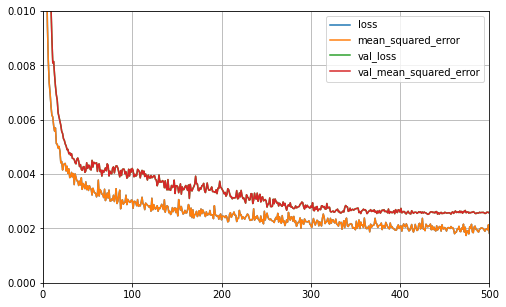

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_xlim(0,500)
plt.gca().set_ylim(0,0.01)
model.save('my_keras_model_13prova_aa!!last.h5')

In [41]:
#model=keras.models.load_model('my_keras_model_13bis.h5') 
#model.summary()
model2=keras.models.load_model('my_keras_model_13prova_aa!!last.h5') 
model2.summary()

#to visualize activation functions
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(f'{i}   {model.layers[i]}: \n{model.layers[i].get_config()} \n')
#info about optimizers
model.optimizer.get_config()        

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 11)                44        
_________________________________________________________________
dense_30 (Dense)             (None, 1250)              15000     
_________________________________________________________________
batch_normalization_21 (Batc (None, 1250)              5000      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                62550     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 51        
Total params: 82,645
Trainable params: 80,123
Non-trainable params: 2,522
_________________________________________________________________
0 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002607556B3D0>
   no activ

{'name': 'Adam',
 'learning_rate': 2.4e-06,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.99,
 'epsilon': 1e-08,
 'amsgrad': 'False'}

### Predict on validation dataset

RMSE: 0.01927
    PHIF  : 0.00301
    SW    : 0.01979
    VSH   : 0.02671
R^2:  0.9913324327675567
    PHIF  : 0.99805
    SW    : 0.99500
    VSH   : 0.98094


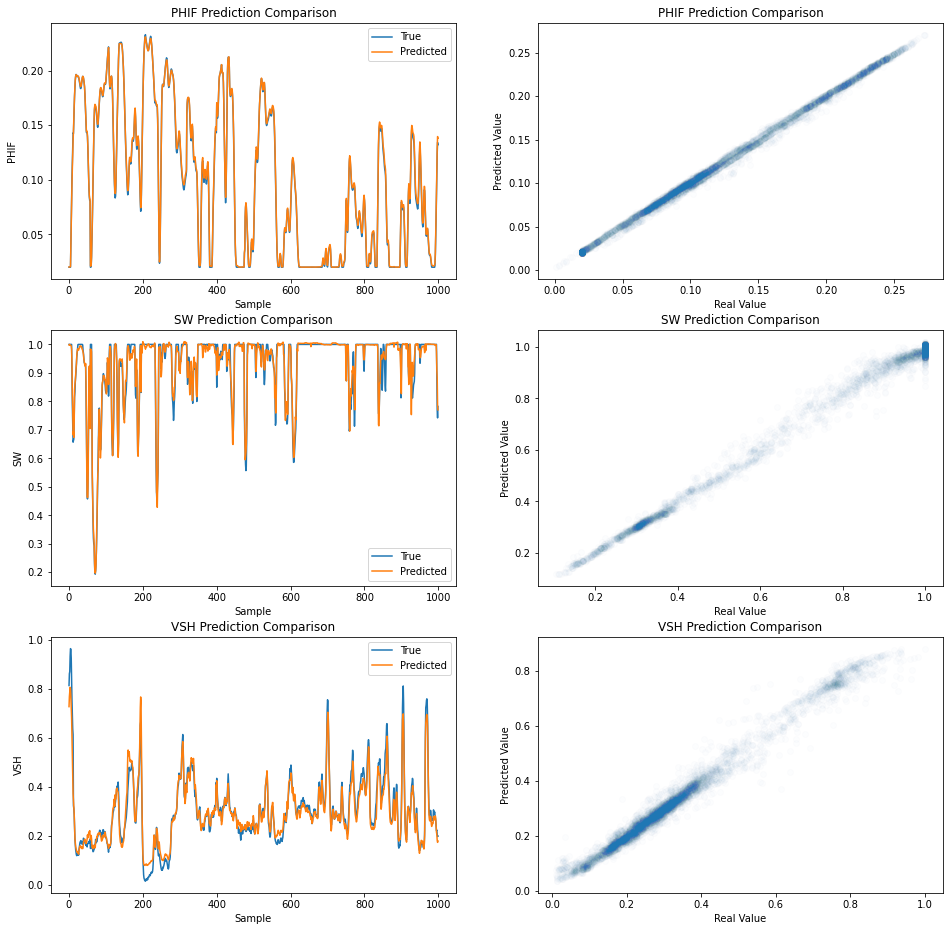

RMSE: 0.03517
    PHIF  : 0.00488
    SW    : 0.03416
    VSH   : 0.05020
R^2:  0.9561650084308275
    PHIF  : 0.99270
    SW    : 0.92554
    VSH   : 0.95026


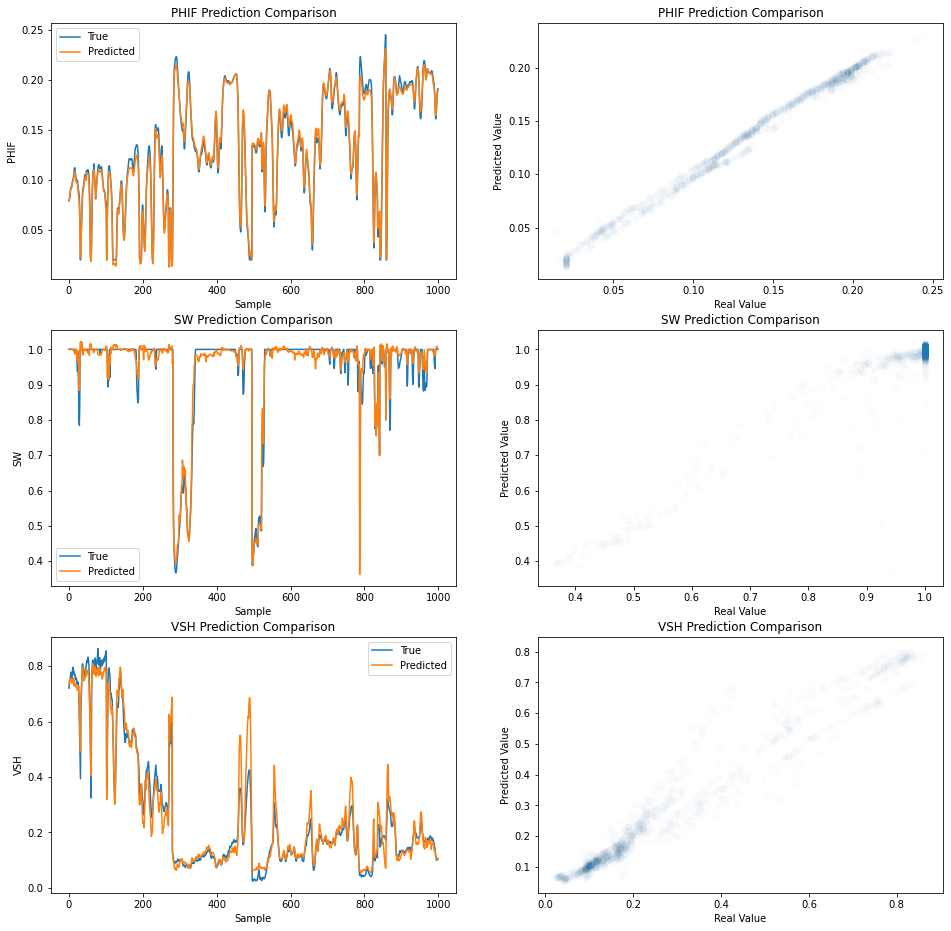

true:        0    1    2
0    0.02 1.00 0.81
1    0.02 1.00 0.86
2    0.02 1.00 0.87
3    0.02 1.00 0.93
4    0.02 1.00 0.97
...   ...  ...  ...
5218 0.08 1.00 0.75
5219 0.08 1.00 0.76
5220 0.08 1.00 0.77
5221 0.08 1.00 0.78
5222 0.08 1.00 0.75

[5223 rows x 3 columns]
pred:        0    1             2
0    0.02 1.00   [0.7284967]
1    0.02 1.00   [0.7697129]
2    0.02 1.00  [0.78945124]
3    0.02 1.00   [0.8076896]
4    0.02 1.00   [0.8010984]
...   ...  ...           ...
5218 0.08 1.00   [0.7266289]
5219 0.08 1.00  [0.74900126]
5220 0.08 1.00   [0.7554842]
5221 0.08 1.00    [0.775655]
5222 0.08 1.00  [0.75321287]

[5223 rows x 3 columns]
true:        0    1    2
0    0.08 1.00 0.72
1    0.08 1.00 0.74
2    0.08 1.00 0.75
3    0.09 1.00 0.75
4    0.09 1.00 0.77
...   ...  ...  ...
1301 0.06 1.00 0.80
1302 0.06 1.00 0.81
1303 0.06 1.00 0.82
1304 0.06 1.00 0.83
1305 0.06 1.00 0.84

[1306 rows x 3 columns]
pred:        0    1             2
0    0.08 1.00  [0.73628604]
1    0.08 1.00   [0

In [42]:
if n_clust >1:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),
                            reg_best_SW.predict(X_train),VSH_pred.values.flatten()]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),y_train['SW'].values.tolist(),VSH_true.values.flatten()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),
                        reg_best_SW.predict(X_val),VSH_pred_val.values.flatten()]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),y_val['SW'].values.tolist(),VSH_true_val.values.flatten()]).T
else:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),
                            reg_best_SW.predict(X_train),model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),y_train['SW'].values.tolist(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),
                        reg_best_SW.predict(X_val),model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),y_val['SW'].values.tolist(),y_val['VSH'].values.tolist()]).T
    
    
result_plot(y_predict, y_true)#,names=['PHIF', 'SW',list(range(n_clust))])
result_plot(y_predict_val, y_true_val)

print(f'true:{y_true}')
print(f'pred:{y_predict}')

print(f'true:{y_true_val}')
print(f'pred:{y_predict_val}')

### Predict the test dataset

In [43]:
# load test data
df2 = pd.read_csv('test.csv')

# Replace missing value -9999 with np.nan
df2.replace(['-9999', -9999], np.nan, inplace=True)

df2.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,11275.00,11275.00,10614.00,3911.00,11275.00,11275.00,11193.00,11193.00,11275.00,11271.00,11193.00,11198.00,11198.00,6394.00
mean,102.01,12643.58,81.92,146.65,8.53,8.53,2.41,0.03,65.90,0.21,4.14,32.27,35.85,44.89
std,1.64,2516.27,11.36,15.44,0.31,0.19,0.15,0.03,56.26,0.08,1.43,265.81,301.75,56.58
min,100.00,10177.50,48.28,98.21,8.50,8.25,1.33,-0.10,3.99,0.04,1.55,0.10,0.10,3.02
25%,100.00,10869.50,74.20,138.00,8.50,8.36,2.27,0.00,30.11,0.16,3.08,1.74,1.70,24.82
50%,101.00,11343.00,82.69,145.53,8.50,8.51,2.45,0.02,53.77,0.20,3.90,2.86,2.76,25.05
75%,104.00,16034.25,88.91,158.38,8.50,8.65,2.54,0.04,94.25,0.24,5.02,8.18,7.88,44.09
max,104.00,17443.50,125.39,190.26,12.25,9.31,3.20,0.19,1711.42,0.73,15.14,5000.00,5000.00,300.11


In [44]:
test_data = np.array(df2.loc[:, ['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED',]])

# Imputation transformer for completing missing values.
imp_mean = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=25, random_state=100))
test_data = imp_mean.fit_transform(test_data)

# standardize testing data
X_test = scaler.transform(test_data)

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [52]:
# run the prediction
test_predict = np.array([reg_best_PHIF.predict(X_test),
                        reg_best_SW.predict(X_test),model.predict(X_test).flatten()]).T
test_predict

array([[0.07037011, 0.94180516, 0.05214669],
       [0.08147858, 0.93300165, 0.05436425],
       [0.09026193, 0.86129003, 0.04761193],
       ...,
       [0.13936859, 0.99753668, 0.1966574 ],
       [0.14630485, 0.97935067, 0.19110242],
       [0.1560724 , 0.98290819, 0.19372717]])

In [53]:
# Replace team_name and num_submit
team_name = 'Iron486'
num_submit = 1

# Please don't change codes below
N_SAMPLES = 11275
n_sub_dict = {1:1, 2:2, 3:3}

# Check submission number is correct
try:
    n_sub = n_sub_dict[num_submit]
except KeyError:
    print(f"ERROR!!! Submission Number must be in 1, 2 or 3")

# Check number of samples are correct
if test_predict.shape[0] != N_SAMPLES:
    raise ValueError(f"Number of samples {test_predict.shape[0]} doesn't matches with the correct value {N_SAMPLES}")

# Write results to csv file
output_result = pd.DataFrame({col_names[-3]:test_predict[:,0], col_names[-2]:test_predict[:,1], col_names[-1]:test_predict[:,2]})
output_result.to_csv(path_or_buf=f'./{team_name}_{n_sub}.csv', index=False)